# Tarea 1

*Integrantes:* 
* Fuentes Fuentes Adrián 
* Olivares Hernández Francisco Javier
* Ramírez Montes Jonathan Natael 
* Sánchez Romero Paulina Michelle

### Problema 1: 

El objetivo de las bases es que realicemos un modelo de clasificación para poder contestar la siguiente pregunta:

* *¿Damos un crédito bancario o no?* \
Para empezar con la exploración de la base, tendrán que generar un análisis descriptivo de la información que les compartiré:\
 **1.-** Los campos *_id_* que son los identificadores de la información.\
 **2.-** *base_ini_interna.* \
 **3.-** *base_ini_parte1.* \
 **4.-** *base_ini_externa.* \
 **5.-** *bases de comportamiento.* \
 **6.-** *base_inversión*, es una variable simulada de una gamma. \
 **7.-** Cuando una variable es categórica, está implícito en el nombre de la base. No tenemos un diccionario, simplemente que son categóricas. \
 **8.-** El resto entonces son continuas. Es decir, los nombre estám enmascarados, ni siquiera yo sé qué significan.
$\newline$
* *¿Cómo hago los cruces?* \
Exploren la información.
$\newline$
* *¿Qué análisis puedo realizar?* \
Exploren ustedes, apóyense de los comportamientos de los ids.
$\newline$
* Pero... *¿Las preguntas son abiertas?* \
Así es, quiero que exploren. Hay bases que vienen en csv y otras en txt. Vean como tratarlas.

In [1]:
#Importamos las paqueterías necesarias para poder manipular los datos con los que trabajaremos.

#Manipulación de bases de datos.
import pandas as pd

#Importamos csv para manipular bases de datos que tengan ese formato.
import csv

#Importamos esta paquetería para poder mostrar gráficas e información estadística de forma más detallada.
import seaborn as sns

#Manejo de matrices, vectores y operaciones con arreglos.
import numpy as np

#Creación de gráficas.
import matplotlib.pyplot as plt

#Manipulación de datos con un formato de fecha.
from datetime import datetime, timedelta

#Importamos esta paquetería para poder realizar operaciones estadísticas de regresión lineal.
from sklearn.linear_model import LinearRegression

#Lo utilizaremos para obtener el coeficiente de correlación de variables no paramétricas que se encuentran entre dos conjuntos de datos.
from scipy.stats import spearmanr

#Importamos science python para utilizar funciones estadísticas
import scipy

In [3]:
#Importamos la base de datos "base_ini_interna.csv".
base_ini_interna = pd.read_csv('../datasets/base_ini_interna.csv', parse_dates = ['fecha_inicio'])
#Mostramos las primeras 5 filas de la base de datos importada.
base_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [4]:
#Importamos la base de datos "base_ini_parte1.csv".
base_ini_parte1 = pd.read_csv(path + "base_ini_parte1.csv")
#Mostramos las primeras 5 filas de la base de datos importada.
base_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [5]:
#Importamos la base de datos "base_inversion.txt".
base_inversion = pd.read_table(path + "base_inversion.txt", delimiter = ' ')
#Mostramos las primeras 5 filas de la base de datos importada.
base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [6]:
#Importamos la base de datos "base_ini_externa.txt".
base_ini_externa = pd.read_csv(path + "base_ini_externa.txt", delimiter = ' ')
#Mostramos las primeras 5 filas de la base de datos importada.
base_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


##### Cruce de base base_ini_parte1 con base_inversion

In [7]:
#Cruzamos las tablas tomando como referencia las tuplas de la tabla izquierda (base_ini_parte1), haciendo el enlace por medio de la columna en común "_id2_" y obteniendo de la tabla derecha (base_inversion) la columna "inversion".
c_0 = pd.merge(base_ini_parte1, base_inversion, on = ['_id2_'], how = 'left')

In [8]:
#En esta nueva tabla generada a través del cruce, a la columna "inversion" le reemplazamos los valores no disponibles (NA) por ceros.
c_0['inversion'].fillna(0, inplace = True)

In [9]:
#Mostramos las primeras 5 filas de la tabla generada a través del cruce.
c_0.head()

,_id_,_id2_,comp_mixto1,inversion
0,78213,1798899,0.33522,0.000000
1,76457,1758511,0.33334,0.041039
2,40666,935318,0.29186,0.000000
3,8329,191567,0.29112,0.000000
4,68389,1572947,0.27318,77.422135


In [10]:
#Asignamos a una variable los valores de la columna "_id_" que se encuentran en la tabla "base_ini_interna" y los ordenamos de forma ascendente.
x = base_ini_interna["_id_"].sort_values(ascending = True)

In [11]:
#Asignamos a una variable los valores de la columna "_id_" que se encuentran en la tabla "base_ini_externa" y los ordenamos de forma ascendente.
y = base_ini_externa["_id_"].sort_values(ascending = True)

In [12]:
#Asignamos a una variable el resultado obtenido al comparar los datos de las columnas "_id_" que se encuentran en las tablas "base_ini_interna" y "base_ini_externa".
z = (x == y)

In [13]:
#Contamos el tipo de valores que fueron asigandos a la variable z.
z.value_counts()

#El resultado nos muestra que los datos de las columnas "_id_" de ambas tablas son iguales. Por lo cual, podemos hacer un cruce entre estas tablas sin problema alguno usando la columna "_id_" como enlace. 

True    50000
Name: _id_, dtype: int64

##### Primer cruce

In [14]:
#Cruzamos las tablas tomando como referencia las tuplas de ambas tablas (base_ini_interna y base_ini_externa), haciendo el enlace por medio de la columna "_id_".
c_1 = pd.merge(base_ini_interna,base_ini_externa, how='inner', on="_id_")

In [15]:
#Mostramos las primeras 3 filas de la tabla generada a través del cruce.
c_1.head(3)

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,2020-03-25,0.0,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0
1,76457,2020-02-13,0.0,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0
2,40666,2018-01-24,0.0,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0


##### Cruce de c_0 con c_1

In [16]:
#Obtenemos la longitud de las 2 tablas que obtuvimos como resultado de los cruces.
len(c_0), len(c_1)

(50000, 50000)

In [17]:
#Cruzamos las tablas tomando como referencia las tuplas de ambas tablas (c_0 y c_1), haciendo el enlace por medio de la columna "_id_".
c_0_1 = pd.merge(c_0, c_1, how = 'inner', on = '_id_')

In [18]:
#Mostramos la tabla generada a través del cruce.
c_0_1

,_id_,_id2_,comp_mixto1,inversion,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,1798899,0.33522,0.000000,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0
1,76457,1758511,0.33334,0.041039,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0
2,40666,935318,0.29186,0.000000,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0
3,8329,191567,0.29112,0.000000,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0
4,68389,1572947,0.27318,77.422135,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,78795,1812285,0.34318,0.000000,2020-04-27,0.000000,b'1',2.0,50.0,2.0,6.0,147.0,140.579710,13.932778,95.0,-230.0
49996,9126,209898,0.38000,730.952882,2016-08-10,1215.805471,b'1',30.0,70.0,3.0,4.0,175.0,188.405797,9.652399,114.0,-230.0
49997,44847,1031481,0.34000,24.763419,2018-09-17,0.000000,b'1',3.0,58.0,2.0,9.0,148.0,434.782609,33.323758,124.0,-230.0
49998,87200,2005600,0.26984,0.000000,2020-10-27,0.000000,b'1',19.0,59.0,3.0,4.0,164.0,919.130435,57.454754,108.0,-230.0


##### Cruce de base comportamiento 2 y 3

In [19]:
#Asignamos a una variable los valores de la columna "_id_" que se encuentran en la tabla "base_ini_parte1" y los ordenamos de forma ascendente.
a = base_ini_parte1["_id_"].sort_values(ascending = True)

In [20]:
#Asignamos a una variable el resultado obtenido al comparar los datos de las columnas "_id_" que se encuentran en las tablas "base_ini_interna" y "base_ini_parte1".
b = (x == a)

In [21]:
#Contamos el tipo de valores que fueron asigandos a la variable b.
b.value_counts()

#El resultado nos muestra que los datos de las columnas "_id_" de ambas tablas son iguales. Por lo cual, podemos hacer un cruce entre estas tablas sin problema alguno usando la columna "_id_" como enlace. 

True    50000
Name: _id_, dtype: int64

In [22]:
#Importamos la base de datos "base_comportamiento_2.txt".
base_comportamiento_2 = pd.read_table(path + "base_comportamiento_2.txt",delimiter = ' ', 
                                      parse_dates = ['mes_informacion'])
#Mostramos las primeras 5 filas de la base de datos importada.
base_comportamiento_2.head()

,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01,0.0
1,1,2016-05-01,1.0
2,1,2016-06-01,2.0
3,1,2016-07-01,3.0
4,1,2016-08-01,4.0


In [23]:
#Importamos la base de datos "base_comportamiento_3.txt".
base_comportamiento_3 = pd.read_csv(path + "base_comportamiento_3.csv", parse_dates = ['mes_informacion'])
#Mostramos las primeras 5 filas de la base de datos importada.
base_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01,0.0
1,1,2016-05-01,0.0
2,1,2016-06-01,0.0
3,1,2016-07-01,0.0
4,1,2016-08-01,0.0


##### Intentando cruzar por fecha, revisando si las fechas son unicas 

In [24]:
#Obtenemos la longitud de la base de datos importada "base_comportamiento_2".
len(base_comportamiento_2)

1455536

In [25]:
#Asignamos a una variable los valores de la columna "num_caso" que se encuentran en la tabla "base_comportamiento_2" y los ordenamos de forma ascendente.
z1 = base_comportamiento_2["num_caso"].sort_values(ascending = True)

In [26]:
#Asignamos a una variable los valores de la columna "num_caso" que se encuentran en la tabla "base_comportamiento_3" y los ordenamos de forma ascendente.
z2 = base_comportamiento_3["num_caso"].sort_values(ascending = True)

In [27]:
#Asignamos a una variable el resultado obtenido al comparar los datos de las columnas "num_caso" que se encuentran en las tablas "base_comportamiento_2" y "base_comportamiento_3".
z3 = (z1==z2)

In [28]:
#Contamos el tipo de valores que fueron asigandos a la variable z3.
z3.value_counts()

#El resultado nos muestra que los datos de las columnas "num_caso" de ambas tablas son iguales. Por lo cual, podemos hacer un cruce entre estas tablas sin problema alguno usando la columna "num_caso" como enlace.

True    1455536
Name: num_caso, dtype: int64

In [29]:
#Cruzamos las tablas tomando como referencia las tuplas de ambas tablas (base_comportamiento_2 y base_comportamiento_3), haciendo el enlace por medio de las columnas "num_caso" y "mes_informacion".
c_2 = pd.merge(base_comportamiento_2,base_comportamiento_3, how='inner', on = ['num_caso', 'mes_informacion'])

In [30]:
#Renombramos la columna "num_caso" por "_id_"
c_2.rename(columns={'num_caso':'_id_'}, inplace=True)

In [31]:
#Mostramos las últimas 5 filas de la tabla generada a través del cruce.
c_2.tail()

,_id_,mes_informacion,Tiempo_aparicion,comportamiento_j
1455531,98990,2021-05-01,1.0,0.0
1455532,98992,2021-04-01,0.0,0.0
1455533,98992,2021-05-01,1.0,0.0
1455534,98997,2021-04-01,0.0,0.0
1455535,98997,2021-05-01,1.0,0.0


In [32]:
#Obtenemos la longitud de las 2 tablas que obtuvimos como resultado de los cruces.
len(c_0_1), len(c_2)

(50000, 1455536)

In [33]:
#Agrupamos las tuplas de la tabla "c_2" de acuerdo a los datos de la columna "_id_" y los ordenamos de forma ascendente. 
c_2 = c_2.groupby(by = ['_id_'], as_index = False).max()

In [34]:
#Mostramos las primeras 5 filas de la tabla recién agrupada.
c_2.head()

,_id_,mes_informacion,Tiempo_aparicion,comportamiento_j
0,1,2021-05-01,61.0,1.0
1,7,2018-05-01,28.0,6.0
2,8,2021-04-01,51.0,1.0
3,9,2017-04-01,14.0,0.0
4,10,2017-05-01,15.0,1.0


In [35]:
#Obtenemos la longitud de la tabla agrupada por "_id_"
len(c_2)

49352

#### Como tabla final tenemos la union de todas las tablas

In [36]:
#Cruzamos las tablas tomando como referencia las tuplas de la tabla izquierda (c_0_1), haciendo el enlace por medio de la columna en común "_id_" y obteniendo de la tabla derecha (c_2) las columnas "mes_informacion", "Tiempo_aparicion" y "comportamiento_j".
final = pd.merge(c_0_1, c_2, how='left', on = ['_id_'])

In [37]:
#Mostramos las primeras 5 filas de la tabla generada a través del cruce.
final.head()

,_id_,_id2_,comp_mixto1,inversion,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,mes_informacion,Tiempo_aparicion,comportamiento_j
0,78213,1798899,0.33522,0.000000,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0,260.869565,25.854639,56.0,-230.0,2021-05-01,13.0,1.0
1,76457,1758511,0.33334,0.041039,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0,40.579710,2.872738,62.0,-230.0,2021-05-01,15.0,1.0
2,40666,935318,0.29186,0.000000,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0,NaN,NaN,119.0,-230.0,2019-05-01,15.0,1.0
3,8329,191567,0.29112,0.000000,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0,349.275362,34.616490,94.0,-230.0,2021-05-01,44.0,0.0
4,68389,1572947,0.27318,77.422135,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0,276.811594,27.434645,125.0,-230.0,2021-05-01,20.0,1.0


In [38]:
#Obtenemos la información general de la tabla "final".
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id_              50000 non-null  int64         
 1   _id2_             50000 non-null  int64         
 2   comp_mixto1       50000 non-null  float64       
 3   inversion         50000 non-null  float64       
 4   fecha_inicio      50000 non-null  datetime64[ns]
 5   comp_interno1     50000 non-null  float64       
 6   comp_interno2     50000 non-null  object        
 7   comp_interno3     50000 non-null  float64       
 8   comp_interno4     50000 non-null  float64       
 9   categoria1        50000 non-null  float64       
 10  categoria2        50000 non-null  float64       
 11  categoria3        50000 non-null  float64       
 12  comp_externo1     47831 non-null  float64       
 13  comp_externo2     44410 non-null  float64       
 14  comp_externo3     4999

In [39]:
#Reemplazamos los valores no disponibles (NA) por ceros, que se encuentran en la tabla "final".
final.fillna(0, inplace = True)

In [40]:
#Los datos de las columnas "_id_" y "_id2_" son convertidos a datos de tipo string.
final[['_id_', '_id2_']] = final[['_id_', '_id2_']].astype(str) 

In [41]:
#Los datos de la columna "mes_informacion" los corregimos con el formato de fecha que ofrece la paquetería pandas.
final['mes_informacion'] = pd.to_datetime(final['mes_informacion'], errors = 'coerce')

In [42]:
#Obtenemos los valores estadísticos básicos de la tabla "final", tales como: cantidad de observaciones, media, desviación estándar, valor mínimo, cuartiles y valor máximo. 
final.describe()

,comp_mixto1,inversion,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,Tiempo_aparicion,comportamiento_j
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,0.337124,65.215650,1058.571975,14.663740,56.537440,1.842300,8.034660,159.663740,5.955465e+02,33.416022,66.372180,3.175998e+08,27.764020,1.045700
std,0.037864,574.991187,5050.133027,8.816343,10.051582,0.939685,2.036502,8.816343,1.725186e+04,39.933637,140.016215,1.753622e+09,17.994314,1.317242
min,0.200000,0.000000,0.000000,1.000000,24.000000,1.000000,1.000000,146.000000,0.000000e+00,0.000000,-609.000000,-2.300000e+02,0.000000,0.000000
25%,0.314540,0.000000,0.000000,8.000000,48.000000,1.000000,8.000000,153.000000,1.159420e+02,8.043666,72.000000,-2.300000e+02,12.000000,1.000000
50%,0.344530,0.000000,0.000000,15.000000,55.000000,2.000000,9.000000,160.000000,2.463768e+02,20.396438,99.000000,-2.300000e+02,26.000000,1.000000
75%,0.369240,8.077030,1013.171226,21.000000,64.000000,2.000000,9.000000,166.000000,5.217391e+02,44.240161,120.000000,-2.300000e+02,42.000000,1.000000
max,0.430060,95052.396733,329483.282675,32.000000,79.000000,6.000000,13.000000,177.000000,2.898551e+06,861.821316,159.000000,1.000000e+10,64.000000,18.000000


In [43]:
#Contamos el tipo de valores que se encuentran en la columna "comp_interno2".
final['comp_interno2'].value_counts()

b'1'    35292
b'0'    14708
Name: comp_interno2, dtype: int64

In [44]:
#Asignamos a una variable los datos que se encuentran en la columna "inversion".
inv = final['inversion']

In [45]:
#Creamos un bucle for para obtener los percentiles de 5 en 5 hasta llegar a 100 de los valores de las inversiones.
for i in range(0,101, 5):
    p = np.percentile(inv, i)
    print(f'El percentil de la inversion al {i}% es {p}')

El percentil de la inversion al 0% es 0.0
El percentil de la inversion al 5% es 0.0
El percentil de la inversion al 10% es 0.0
El percentil de la inversion al 15% es 0.0
El percentil de la inversion al 20% es 0.0
El percentil de la inversion al 25% es 0.0
El percentil de la inversion al 30% es 0.0
El percentil de la inversion al 35% es 0.0
El percentil de la inversion al 40% es 0.0
El percentil de la inversion al 45% es 0.0
El percentil de la inversion al 50% es 0.0
El percentil de la inversion al 55% es 0.0
El percentil de la inversion al 60% es 0.0
El percentil de la inversion al 65% es 3.908984830807681e-05
El percentil de la inversion al 70% es 2.2311680280046646
El percentil de la inversion al 75% es 8.077030338389731
El percentil de la inversion al 80% es 19.22502217036174
El percentil de la inversion al 85% es 43.89290256709453
El percentil de la inversion al 90% es 106.54414702450399
El percentil de la inversion al 95% es 292.3297508751439
El percentil de la inversion al 100% e

In [46]:
#Creamos un bucle for para obtener los percentiles 95 - 100 de los valores de las inversiones.
for i in range(95,101):
    p = np.percentile(inv, i)
    print(f'El percentil de la inversion al {i}% es {p}')

El percentil de la inversion al 95% es 292.3297508751439
El percentil de la inversion al 96% es 382.52494002333725
El percentil de la inversion al 97% es 504.0245740956821
El percentil de la inversion al 98% es 721.9328399066508
El percentil de la inversion al 99% es 1176.977154259045
El percentil de la inversion al 100% es 95052.3967327888


In [47]:
#Asignamos a una variable los valores de la columna "Tiempo_aparicion" de la tabla "final".
tiempo = final['Tiempo_aparicion']

#Creamos un bucle for para obtener los percentiles de 5 en 5 hasta llegar a 100 de los valores de los tiempos de aparición.
for i in range(0,101, 5):
    p = np.percentile(tiempo, i)
    print(f'El percentil del tiempo de aparicion al {i}% es {p}')

El percentil del tiempo de aparicion al 0% es 0.0
El percentil del tiempo de aparicion al 5% es 2.0
El percentil del tiempo de aparicion al 10% es 5.0
El percentil del tiempo de aparicion al 15% es 7.0
El percentil del tiempo de aparicion al 20% es 9.0
El percentil del tiempo de aparicion al 25% es 12.0
El percentil del tiempo de aparicion al 30% es 15.0
El percentil del tiempo de aparicion al 35% es 17.0
El percentil del tiempo de aparicion al 40% es 20.0
El percentil del tiempo de aparicion al 45% es 23.0
El percentil del tiempo de aparicion al 50% es 26.0
El percentil del tiempo de aparicion al 55% es 29.0
El percentil del tiempo de aparicion al 60% es 32.0
El percentil del tiempo de aparicion al 65% es 35.0
El percentil del tiempo de aparicion al 70% es 39.0
El percentil del tiempo de aparicion al 75% es 42.0
El percentil del tiempo de aparicion al 80% es 46.0
El percentil del tiempo de aparicion al 85% es 50.0
El percentil del tiempo de aparicion al 90% es 54.0
El percentil del ti

In [48]:
#Asignamos a una variable los valores de la columna "comportamiento_j" de la tabla "final".
comp_j = final['comportamiento_j']

#Creamos un bucle for para obtener los percentiles de 5 en 5 hasta llegar a 100 de los valores del comportamiento j.
for i in range(0,101, 5):
    p = np.percentile(comp_j, i)
    print(f'El percentil del comportamiento_j al {i}% es {p}')

print()
#Creamos un bucle for para obtener los percentiles 95 - 100 de los valores del comportamiento j.
for i in range(95,101):
    p = np.percentile(comp_j, i)
    print(f'El percentil del comportamiento_j al {i}% es {p}')

El percentil del comportamiento_j al 0% es 0.0
El percentil del comportamiento_j al 5% es 0.0
El percentil del comportamiento_j al 10% es 0.0
El percentil del comportamiento_j al 15% es 0.0
El percentil del comportamiento_j al 20% es 0.0
El percentil del comportamiento_j al 25% es 1.0
El percentil del comportamiento_j al 30% es 1.0
El percentil del comportamiento_j al 35% es 1.0
El percentil del comportamiento_j al 40% es 1.0
El percentil del comportamiento_j al 45% es 1.0
El percentil del comportamiento_j al 50% es 1.0
El percentil del comportamiento_j al 55% es 1.0
El percentil del comportamiento_j al 60% es 1.0
El percentil del comportamiento_j al 65% es 1.0
El percentil del comportamiento_j al 70% es 1.0
El percentil del comportamiento_j al 75% es 1.0
El percentil del comportamiento_j al 80% es 1.0
El percentil del comportamiento_j al 85% es 1.0
El percentil del comportamiento_j al 90% es 1.0
El percentil del comportamiento_j al 95% es 2.0
El percentil del comportamiento_j al 100% 

#### A quiénes sí y a quiénes no damos el crédito?

Dado que no tenemos mucho contexto de las variables, usaremos sólo 2, el mes de información y la variable de la inversión.

In [49]:
#Creamos una nueva tabla con los valores de las columnas "_id_", "mes_informacion" e "inversion" de la tabla "final".
final_1 = final[['_id_', 'mes_informacion', 'inversion']]

In [50]:
#Asignamos a una variable el valor máximo de la columna "mes_informacion" que se encuentra en la tabla "final_1".
fecha_max = final_1['mes_informacion'].max()
fecha_max

Timestamp('2021-05-01 00:00:00')

In [51]:
#Asignamos a una variable la suma de todos los valores contenidos en la columna "inversion" de la tabla "final_1".
tot_inv = final_1['inversion'].sum()
tot_inv

3260782.502637106

In [52]:
#Obtenemos la fecha un año atrás de la fecha máxima obtenida de la columna "mes_informacion" que se encuentra en la tabla "final_1".
fecha_ant = fecha_max- timedelta(weeks = 52)
fecha_ant

Timestamp('2020-05-02 00:00:00')

In [53]:
#Creamos una nueva columna en la tabla "final_1", llamada "porc_inv", la cual almacenará las inversiones expresadas en porcentaje.
final_1['porc_inv'] = final['inversion'] / tot_inv

<ipython-input-53-0d46a4e85529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['porc_inv'] = final['inversion'] / tot_inv


In [54]:
#Asignamos a una variable el percentil al 90% de los valores que representan los porcentajes de inversión.
thresh = np.percentile(final_1['porc_inv'], 90)

In [55]:
#Asignamos a una variable todas aquellas fechas que sean mayores al 2020-05-02.
mini = final_1['mes_informacion'] > fecha_ant

In [56]:
#Asignamos a una variable todas aquellas fechas que sean menores al 2020-05-02.
maxi = final_1['mes_informacion'] < fecha_ant

In [57]:
#Asignamos a una variable a aquellos valores cuyo mes de información no es más antigüo a un año o que su porcentaje de inversion sea mayor al percentil del 90%
mask = ( (final_1['porc_inv'] > thresh) | (mini & maxi ) )

#### Clientes a los que se les da el crédito

A los clientes a los cuales se les dará el crédito, es a aquellos cuyo mes de información no es más antigüo a un año o que su porcentaje de inversion sea mayor al percentil del 90% (tomando al porcentaje de inversión como la división entre la inversión del cliente entre la suma total de las inversiones).

In [58]:
#Mostramos a todos los clientes que son aptos para recibir un crédito.
final_1[mask]

,_id_,mes_informacion,inversion,porc_inv
12,86932,2021-05-01,992.635578,0.000304
29,67961,2021-01-01,561.805974,0.000172
43,2723,2017-05-01,443.717293,0.000136
49,25522,2021-05-01,479.410957,0.000147
72,15216,2021-05-01,673.970607,0.000207
...,...,...,...,...
49946,8130,2017-07-01,123.557515,0.000038
49950,28909,2021-05-01,656.531284,0.000201
49981,32887,2021-05-01,728.274796,0.000223
49985,19139,2021-05-01,154.553909,0.000047


#### Extra: 
Histogramas, Boxplots y Matriz de Correlaciones.

##### Histogramas

In [59]:
#Creamos una función para graficar histogramas.
#Nuestra función tomará la tabla de datos, el número de particiones del histograma, el color, el título del histograma, el título del eje x y el título del eje y.
def hist(tabla, bins, color, titulo, x, y):
            plt.hist(x = tabla, bins = bins, color = color, rwidth=0.85)
            plt.title(titulo)
            plt.xlabel(x)
            plt.ylabel(y)
            return plt.show()

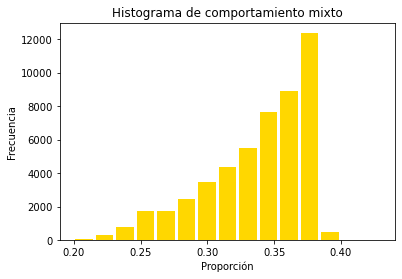

In [60]:
#Histograma de comportamiento mixto
hist(final['comp_mixto1'], 15, 'gold', 'Histograma de comportamiento mixto','Proporción', 'Frecuencia')

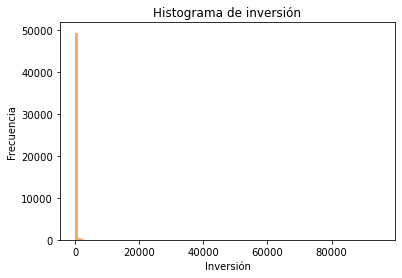

In [61]:
#Histograma de inversión
hist(final['inversion'], 100, '#F2AB6D', 'Histograma de inversión','Inversión', 'Frecuencia')

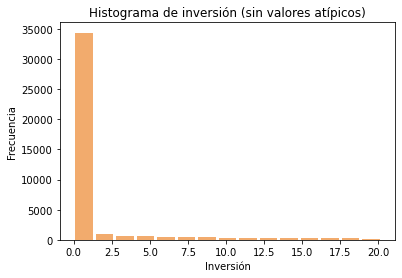

In [62]:
#Histograma de inversión (sin valores atípicos)

#Rango Intercuantil de inversión.
IQR_i = scipy.stats.iqr(final['inversion'], axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
#Valores Atípicos Aislados de inversión.
OC_i = np.percentile(final['inversion'],75) + (1.5 *IQR_i)
#Índice de los Valores Atípicos
IO_i = final["inversion"].index[final["inversion"]<=OC_i].tolist()

#Retiro de Valores Atípicos.
RO_i = []
for i in IO_i:
    RO_i.append(final["inversion"][i])
    
#Creamos el Histograma de inversión (sin valores atípicos).
hist(RO_i, 15, '#F2AB6D', 'Histograma de inversión (sin valores atípicos)','Inversión', 'Frecuencia')

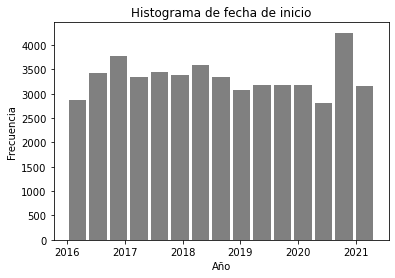

In [63]:
#Histograma de fecha de inicio
hist(final['fecha_inicio'], 15, 'gray', 'Histograma de fecha de inicio','Año', 'Frecuencia')

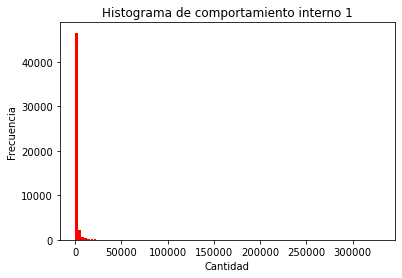

In [64]:
#Histograma de comportamiento interno 1
hist(final['comp_interno1'], 100, 'red', 'Histograma de comportamiento interno 1','Cantidad', 'Frecuencia')

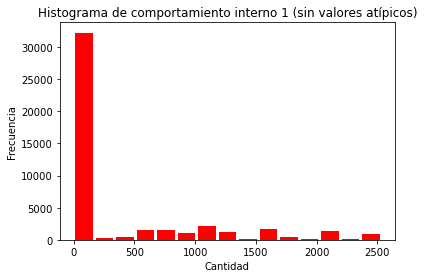

In [65]:
#Histograma de comportamiento interno 1 (sin valores atípicos)

#Rango Intercuantil del comportamiento interno 1.
IQR_ci1 = scipy.stats.iqr(final['comp_interno1'], axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
#Valores Atípicos Aislados del comportamiento interno 1.
OC_ci1 = np.percentile(final['comp_interno1'],75) + (1.5 *IQR_ci1)
#Índice de los Valores Atípicos.
IO_ci1 = final['comp_interno1'].index[final['comp_interno1']<=OC_ci1].tolist()

#Retiro de Valores Atípicos.
RO_ci1 = []
for i in IO_ci1:
    RO_ci1.append(final['comp_interno1'][i])
    
#Creamos el Histograma de comportamiento interno 1 (sin valores atípicos).
hist(RO_ci1, 15, 'red', 'Histograma de comportamiento interno 1 (sin valores atípicos)','Cantidad', 'Frecuencia')

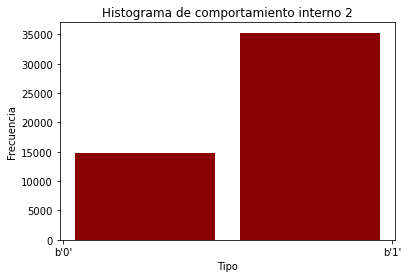

In [66]:
#Histograma de comportamiento interno 2
hist(final['comp_interno2'], 2, 'darkred', 'Histograma de comportamiento interno 2','Tipo','Frecuencia')

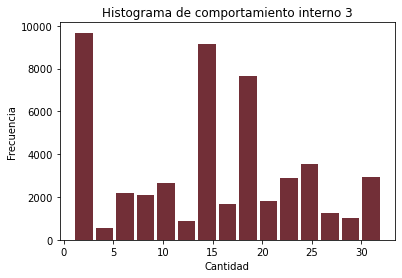

In [67]:
#Histograma de comportamiento interno 3
hist(final['comp_interno3'], 15, '#722f37', 'Histograma de comportamiento interno 3','Cantidad','Frecuencia')

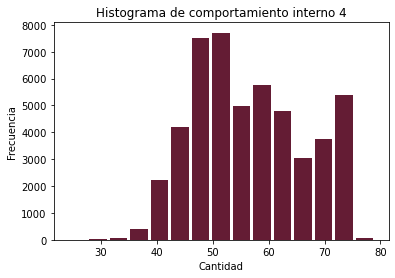

In [68]:
#Histograma de comportamiento interno 4
hist(final['comp_interno4'], 15, '#641c34', 'Histograma de comportamiento interno 4','Cantidad','Frecuencia')

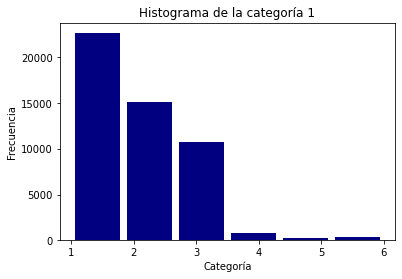

In [69]:
#Histograma de la categoría 1
hist(final['categoria1'], 6, 'navy', 'Histograma de la categoría 1','Categoría','Frecuencia')

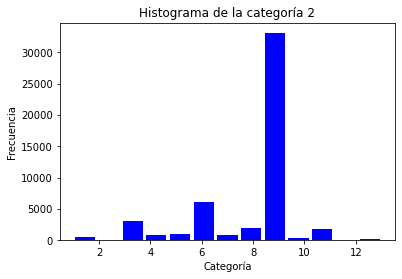

In [70]:
#Histograma de la categoría 2
hist(final['categoria2'], 13, 'blue', 'Histograma de la categoría 2','Categoría','Frecuencia')

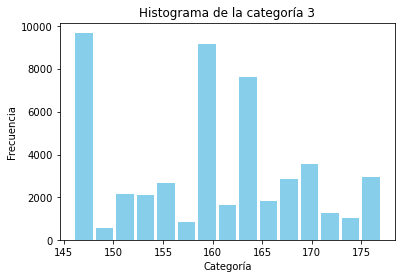

In [71]:
#Histograma de la categoría 3
hist(final['categoria3'], 15, 'skyblue', 'Histograma de la categoría 3','Categoría','Frecuencia')

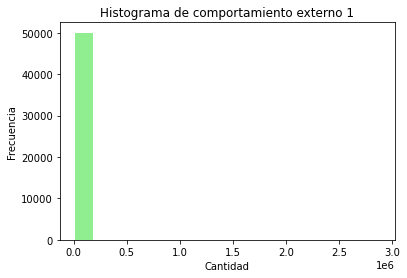

In [72]:
#Histograma de comportamiento externo 1
hist(final['comp_externo1'], 15, 'lightgreen', 'Histograma de comportamiento externo 1','Cantidad','Frecuencia')

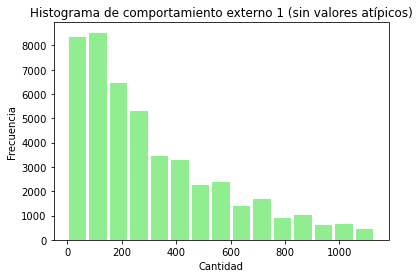

In [73]:
#Histograma de comportamiento externo 1 (sin valores atípicos)

#Rango Intercuantil del comportamiento externo 1.
IQR_ce1 = scipy.stats.iqr(final['comp_externo1'], axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
#Valores Atípicos Aislados del comportamiento externo 1.
OC_ce1 = np.percentile(final['comp_externo1'],75) + (1.5 *IQR_ce1)
#Índice de los Valores Atípicos. 
IO_ce1 = final['comp_externo1'].index[final['comp_externo1']<=OC_ce1].tolist()

#Retiro de Valores Atípicos.
RO_ce1 = []
for i in IO_ce1:
    RO_ce1.append(final['comp_externo1'][i])

#Creamos el Histograma de comportamiento externo 1 (sin valores atípicos).
hist(RO_ce1, 15, 'lightgreen', 'Histograma de comportamiento externo 1 (sin valores atípicos)','Cantidad','Frecuencia')

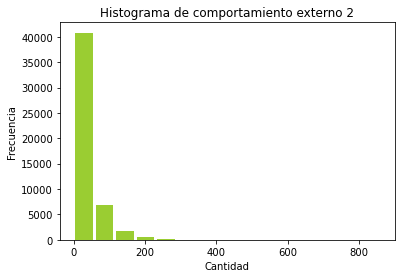

In [74]:
#Histograma de comportamiento externo 2
hist(final['comp_externo2'], 15, 'yellowgreen', 'Histograma de comportamiento externo 2','Cantidad','Frecuencia')

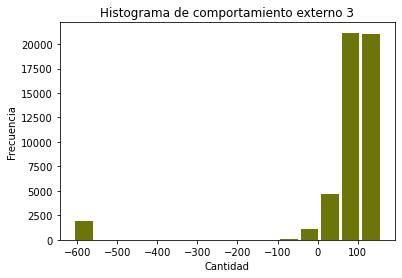

In [75]:
#Histograma de comportamiento externo 3
hist(final['comp_externo3'], 15, '#6b750a', 'Histograma de comportamiento externo 3','Cantidad','Frecuencia')

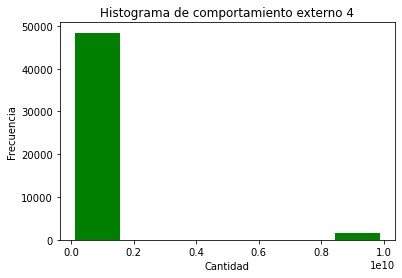

In [76]:
#Histograma de comportamiento externo 4
hist(final['comp_externo4'], 6, 'green', 'Histograma de comportamiento externo 4','Cantidad','Frecuencia')

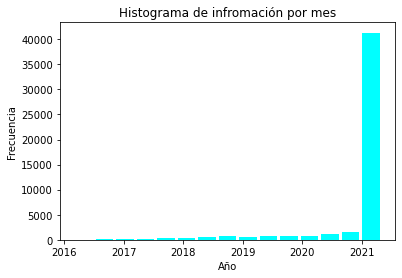

In [77]:
#Histograma de infromación por mes
hist(final['mes_informacion'], 15, 'cyan', 'Histograma de infromación por mes','Año','Frecuencia')

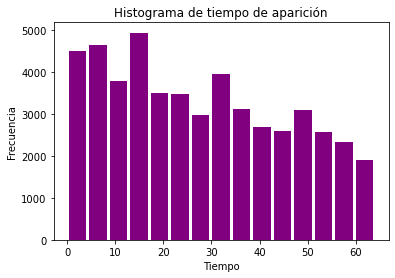

In [78]:
#Histograma de tiempo de aparición
hist(final['Tiempo_aparicion'], 15, 'purple', 'Histograma de tiempo de aparición','Tiempo','Frecuencia')

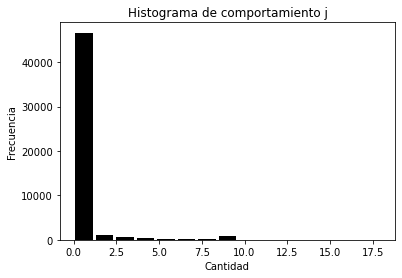

In [79]:
#Histograma de comportamiento j
hist(final['comportamiento_j'], 15, 'black', 'Histograma de comportamiento j','Cantidad','Frecuencia')

##### Boxplots

In [80]:
#Creamos una función para graficar boxplots.
#Nuestra función tomará la tabla de datos, el título del histograma, el título del eje x y el título del eje y.
def bp(tabla, titulo, x, y):
            plt.boxplot(tabla)
            plt.title(titulo)
            plt.xlabel(x)
            plt.ylabel(y)
            return plt.show()

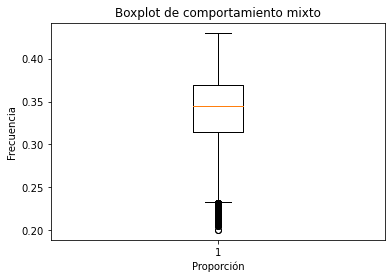

In [81]:
#Boxplot de comportamiento mixto
bp(final['comp_mixto1'], 'Boxplot de comportamiento mixto', 'Proporción', 'Frecuencia')

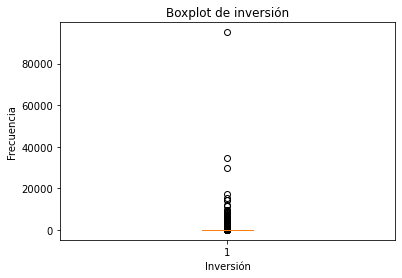

In [82]:
#Boxplot de inversión
bp(final['inversion'], 'Boxplot de inversión', 'Inversión', 'Frecuencia')

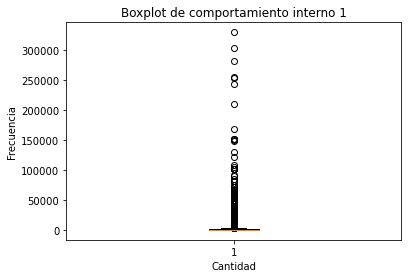

In [83]:
#Boxplot de comportamiento interno 1
bp(final['comp_interno1'], 'Boxplot de comportamiento interno 1', 'Cantidad', 'Frecuencia')

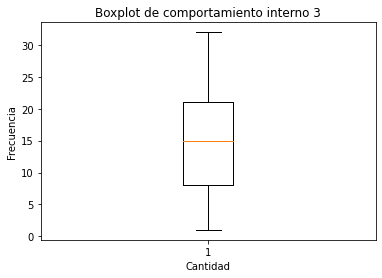

In [84]:
#Boxplot de comportamiento interno 3
bp(final['comp_interno3'], 'Boxplot de comportamiento interno 3', 'Cantidad', 'Frecuencia')

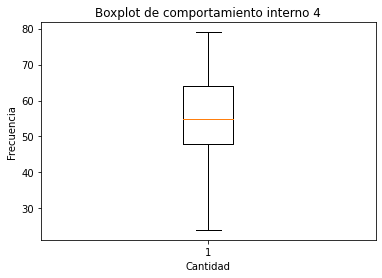

In [85]:
#Boxplot de comportamiento interno 4
bp(final['comp_interno4'], 'Boxplot de comportamiento interno 4', 'Cantidad', 'Frecuencia')

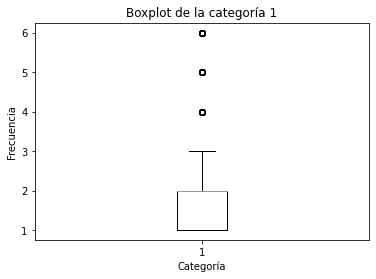

In [86]:
#Boxplot de la categoría 1
bp(final['categoria1'], 'Boxplot de la categoría 1', 'Categoría', 'Frecuencia')

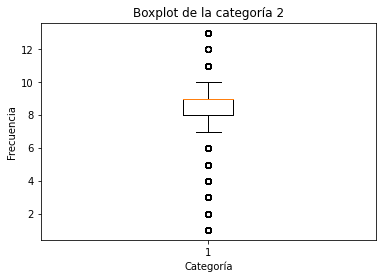

In [87]:
#Boxplot de la categoría 2
bp(final['categoria2'], 'Boxplot de la categoría 2', 'Categoría', 'Frecuencia')

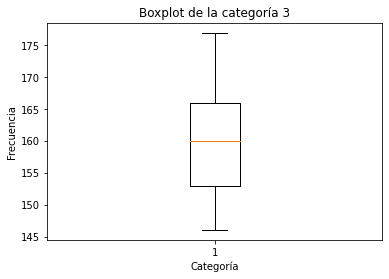

In [88]:
#Boxplot de la categoría 3
bp(final['categoria3'], 'Boxplot de la categoría 3', 'Categoría', 'Frecuencia')

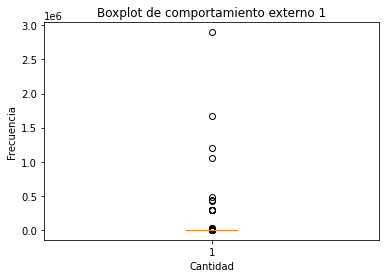

In [89]:
#Boxplot de comportamiento externo 1
bp(final['comp_externo1'], 'Boxplot de comportamiento externo 1', 'Cantidad', 'Frecuencia')

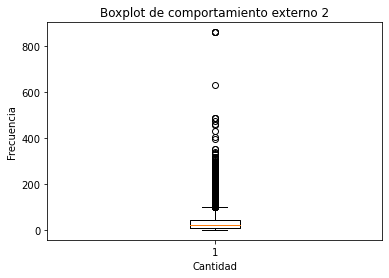

In [90]:
#Boxplot de comportamiento externo 2
bp(final['comp_externo2'], 'Boxplot de comportamiento externo 2', 'Cantidad', 'Frecuencia')

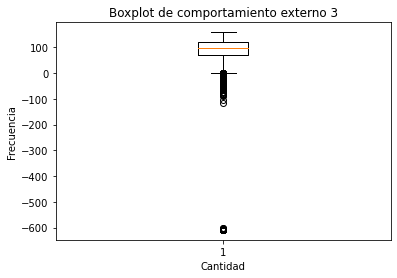

In [91]:
#Boxplot de comportamiento externo 3
bp(final['comp_externo3'], 'Boxplot de comportamiento externo 3', 'Cantidad', 'Frecuencia')

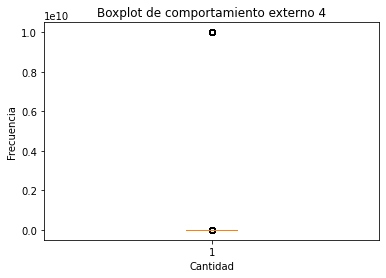

In [92]:
#Boxplot de comportamiento externo 4
bp(final['comp_externo4'], 'Boxplot de comportamiento externo 4', 'Cantidad', 'Frecuencia')

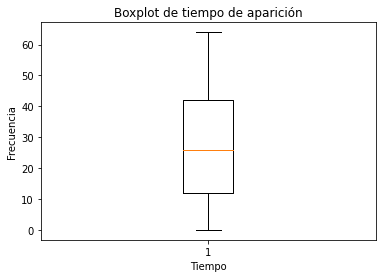

In [93]:
#Boxplot de tiempo de aparición
bp(final['Tiempo_aparicion'], 'Boxplot de tiempo de aparición', 'Tiempo', 'Frecuencia')

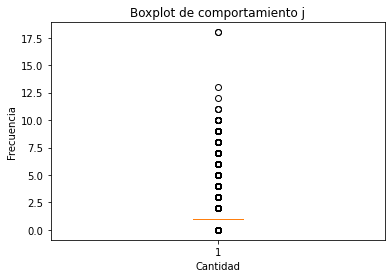

In [94]:
#Boxplot de comportamiento j
bp(final['comportamiento_j'], 'Boxplot de comportamiento j', 'Cantidad', 'Frecuencia')

##### Matriz de Correlaciones

In [95]:
#Para crear la matriz de correlaciones necesitamos quitar las columnas que contienen los id's de la tabla "final", por lo cual creamos una nueva tabla que no los tenga.
final_si = final[["comp_mixto1", "inversion", "fecha_inicio", "comp_interno1", "comp_interno2", "comp_interno3", "comp_interno4", "categoria1", "categoria2", "categoria3", "comp_externo1", "comp_externo2", "comp_externo3", "comp_externo4", "Tiempo_aparicion", "comportamiento_j"]]

In [96]:
#Creamos la Matriz de Correlaciones
corr_df = final_si.corr()
print("La correlación de los datos es:")
print(corr_df, "\n")

La correlación de los datos es:
                  comp_mixto1  inversion  comp_interno1  comp_interno3  \
comp_mixto1          1.000000  -0.022305      -0.062475       0.037184   
inversion           -0.022305   1.000000       0.036716      -0.004737   
comp_interno1       -0.062475   0.036716       1.000000       0.004324   
comp_interno3        0.037184  -0.004737       0.004324       1.000000   
comp_interno4       -0.079492   0.040115       0.111045       0.014043   
categoria1          -0.059576   0.020377       0.037156       0.032573   
categoria2          -0.019758  -0.007869      -0.027525      -0.078761   
categoria3           0.037184  -0.004737       0.004324       1.000000   
comp_externo1       -0.005081   0.001297       0.005545      -0.011347   
comp_externo2       -0.086676   0.050048       0.119096      -0.026636   
comp_externo3        0.037317   0.006008       0.009149       0.012692   
comp_externo4       -0.052200  -0.002212      -0.006181      -0.025511   
Tiempo

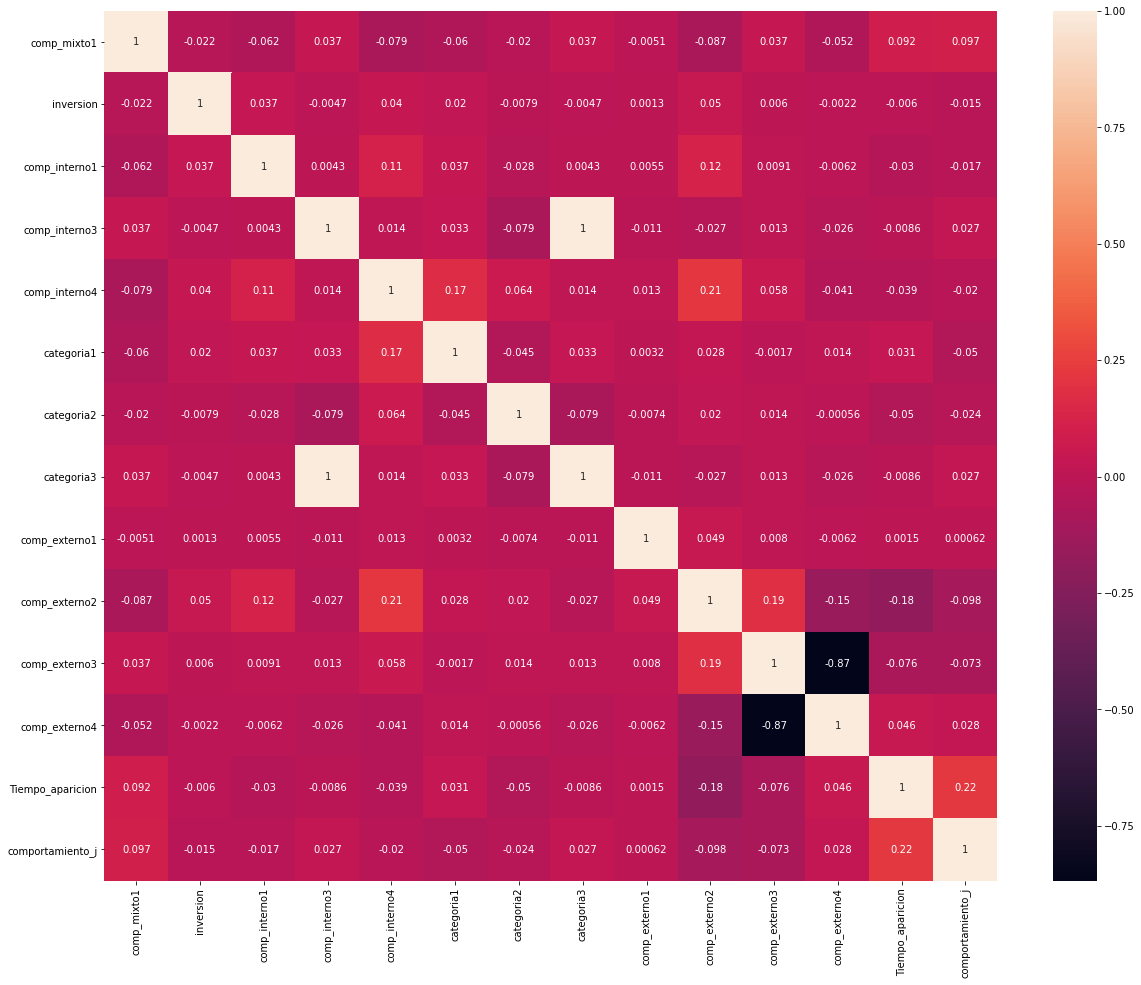

In [97]:
#Mostramos las correlaciones con un mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

La matriz de correlaciones nos muestra que los únicos valores que están relacionados son: \
$\newline$
* **categoria3** y **comp_interno3** con una correlación positiva perfecta igual a $1$, lo cual nos indica que ambas variables reaccionan ante los cambios de la misma forma y que dependen enteramente una de otra.
* **comp_externo3** y **comp_externo4** con una correlación negativa igual a $-0.87$, lo cual nos indica que ambas variables reaccionan de forma inversa a los cambios de la otra, es decir, si una de estas variables aumenta su valor, la otra disminuye el suyo y viceversa. Por lo cual, podedmos decir que dependen una de la otra.


### Problema 2: 

De la base *data_schools* obtener el error estándar con Bootstrap de las variables de la base. 
Recordemos que tienen que simular $N$ muestras Boostrap con tamaño $n$. Luego, el otro ejercicio es que lo hagan con $n-1$.

In [98]:
#Importamos la base de datos "data_schools.xlsx".
e = pd.read_excel(path + 'data_schools.xlsx')
#Mostramos las primeras 5 filas de la base de datos importada.
e.head()

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09


In [99]:
#Seleccionamos aleatoriamente 15 escuelas y las ordenamos en una tabla.
e_a = e.sample(n=15,random_state=10000)[["escuela"]]
#Creamos una nueva columna llamada "seleccion_de_muestra" en esta tabla y le asignamos el valor 1 a cada registro.
e_a["seleccion_de_muestra"]=1

#Cruzamos las tablas tomando como referencia las tuplas de la tabla izquierda (e), haciendo el enlace por medio de la columna en común "escuela" y obteniendo de la tabla derecha (e_a) la columna "seleccion_de_muestra".
e1 = pd.merge(e, e_a, how="left", on=["escuela"])
#Cambiamos los valores no disponibles (NA) que se encuentran en la columna "seleccion_de_muestra" por ceros y transformamos los tipos de datos en integer.
e1["seleccion_de_muestra"] = (e1["seleccion_de_muestra"].fillna(0)).astype(int)

In [100]:
#Creamos una muestra que contenga aquellos valores de las columnas "LSAT" y "GPA" que coinciden en tener un 1 en la columna "seleccion_de_muestra".
t = e1[e1["seleccion_de_muestra"]==1][['LSAT', 'GPA']]

In [101]:
#Empezaremos remuestreando con 1,000 muestras Bootstrap.
#Simulaciones de la muestra.
N1 = 1000    
#Creamos un vector auxiliar que contenga tantos ceros como el número de simulaciones.
c1 = np.zeros(N1)
#Utilizamos este bucle para llevar a cabo las simulaciones.
for i in range(N1):
    #Obtenemos una nueva muestra del mismo tamaño que la muestra anterior.
    s1 = t.sample(len(t), replace = True)
    #A cada entrada de nuestro vector auxiliar le asignamos los valores del coeficiente de correlación de Spearman que se obtuvieron utilizando los valores de las columnas "LSAT" y "GPA" de la muestra.
    c1[i],_ = spearmanr(s1.LSAT, s1.GPA)


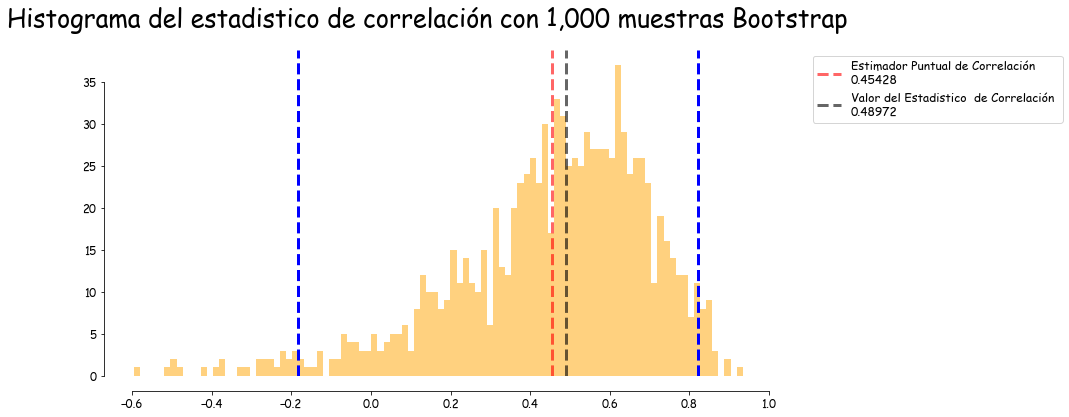

Promedio de la Muestra Bootstrap de Correlación =  0.45428
Valor del Estadistico de Correlación =  0.48972
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.24836
Intervalo de Confianza =  (-0.18420, 0.82283)


In [102]:
#Histograma del estadístico de correlación con 1,000 muestras Bootstrap.
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(c1, bins = 100, color = 'orange', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = True)

plt.suptitle('Histograma del estadistico de correlación con 1,000 muestras Bootstrap', color = 'black', fontsize = 25, fontfamily = 'fantasy')

est_puntual = np.mean(c1)
plt.axvline(est_puntual, linestyle="--", color = "red", linewidth=3, alpha=0.6, label = f"Estimador Puntual de Correlación \n{est_puntual:.5f}")

v1, _ = spearmanr(t.LSAT, t.GPA)
plt.axvline(v1, linestyle="--", color = "black", linewidth = 3, alpha=0.6, label = f"Valor del Estadistico  de Correlación \n{v1:.5f}")

plt.axvline(np.percentile(c1,2.5), color = "blue", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(c1,97.5), color = "blue", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')
plt.yticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))
for i in range(2):
    leg.texts[i].set_color('black')
    leg.texts[i].set_family('fantasy')

plt.show()

print(f"Promedio de la Muestra Bootstrap de Correlación = {est_puntual: .5f}")
print(f"Valor del Estadistico de Correlación = {v1: .5f}")
print(f'Desviación Estandar de la Muestra Bootstrap de Correlación = {np.std(c1): .5f}')
print(f'Intervalo de Confianza =  ({np.percentile(c1,2.5):.5f},{np.percentile(c1,97.5): .5f})')

In [104]:
#Remuestreamos con 20,000 muestras Bootstrap.
#Simulaciones de la muestra.
N2 = 20000    
#Creamos un vector auxiliar que contenga tantos ceros como el número de simulaciones.
c2 = np.zeros(N2)
#Utilizamos este bucle para llevar a cabo las simulaciones.
for i in range(N2):
    #Obtenemos una nueva muestra del mismo tamaño que la muestra anterior.
    s2 = t.sample(len(t), replace = True)
    #A cada entrada de nuestro vector auxiliar le asignamos los valores del coeficiente de correlación de Spearman que se obtuvieron utilizando los valores de las columnas "LSAT" y "GPA" de la muestra.
    c2[i],_ = spearmanr(s2.LSAT, s2.GPA)

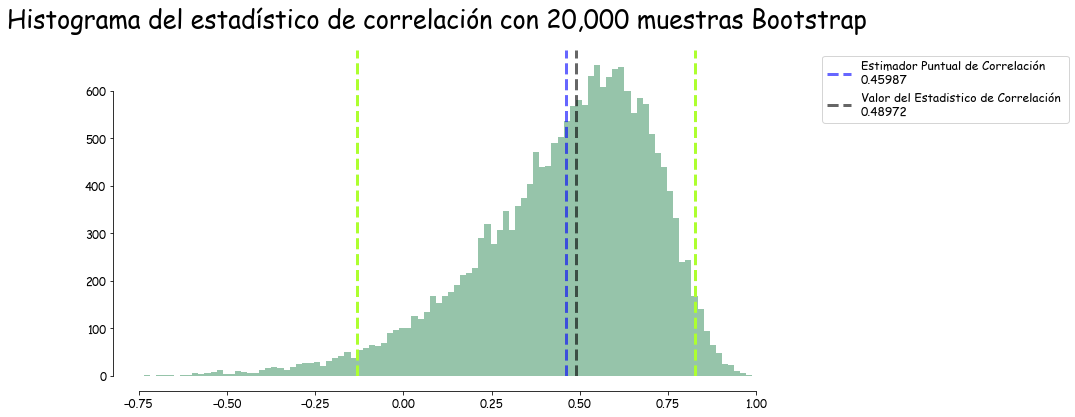

Promedio de la Muestra Bootstrap de Correlación =  0.45987
Valor del Estadistico de Correlación =  0.48972
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.24809
Intervalo de Confianza = (-0.13153, 0.82514)


In [105]:
#Histograma del estadístico de correlación con 20,000 muestras Bootstrap.

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(c2, bins = 100, color = 'SeaGreen', alpha = .5)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = True)

plt.suptitle('Histograma del estadístico de correlación con 20,000 muestras Bootstrap', color = 'black', fontsize = 25, fontfamily = 'fantasy')

est_puntual = np.mean(c2)
plt.axvline(est_puntual, linestyle="--", color = "blue", linewidth=3, alpha=0.6, label = f"Estimador Puntual de Correlación \n{est_puntual:.5f}")

v2, _ = spearmanr(t.LSAT, t.GPA)

plt.axvline(v2, linestyle="--", color = "black", linewidth = 3, alpha=0.6, label = f"Valor del Estadistico de Correlación \n{v2:.5f}")

plt.axvline(np.percentile(c2,2.5), color = "greenyellow", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(c2,97.5), color = "greenyellow", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')
plt.yticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('black')
    leg.texts[i].set_family('fantasy')

plt.show()

print(f"Promedio de la Muestra Bootstrap de Correlación = {np.mean(c2): .5f}")
print(f"Valor del Estadistico de Correlación = {v2: .5f}")
print(f'Desviación Estandar de la Muestra Bootstrap de Correlación = {np.std(c2): .5f}')
print(f'Intervalo de Confianza = ({np.percentile(c2,2.5):.5f},{np.percentile(c2,97.5): .5f})')

In [106]:
#Realizamos 20,000 muestras Bootstrap sobre la pobalción de estudio.
#Simulaciones sobre la población.
N3 = 20000 
#Creamos un vector auxiliar que contenga tantos ceros como el número de simulaciones.
c3 = np.zeros(N3)
#Utilizamos este bucle para llevar a cabo las simulaciones.
for i in range(N3):
    #Obtenemos una nueva muestra del mismo tamaño que la población de estudio.
    s3 = e1.sample(len(e1), replace = True)
    #A cada entrada de nuestro vector auxiliar le asignamos los valores del coeficiente de correlación de Spearman que se obtuvieron utilizando los valores de las columnas "LSAT" y "GPA" de la muestra.
    c3[i],_ = spearmanr(s3.LSAT, s3.GPA)

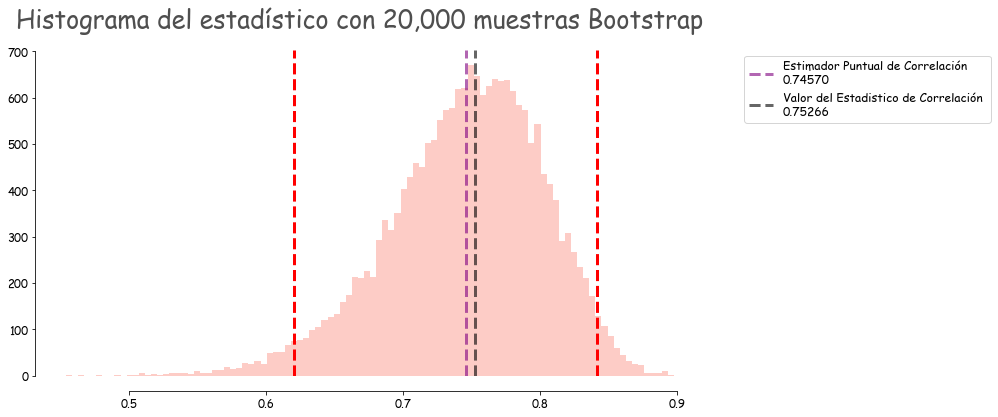

Promedio de la Muestra Bootstrap de Correlación =  0.74570
Valor del Estadistico de Correlación =  0.75266
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.05651
Intervalo de Confianza = (0.62051, 0.84110)


In [107]:
#Histograma del estadístico con 20,000 muestras Bootstrap.

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(c3, bins = 100, color = 'salmon', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = True)

plt.suptitle('Histograma del estadístico con 20,000 muestras Bootstrap', color = '#4f4f4f', fontsize = 25, fontfamily = 'fantasy')

est_puntual = np.mean(c3)
plt.axvline(est_puntual, linestyle="--", color = "purple", linewidth=3, alpha=0.6, label = f"Estimador Puntual de Correlación \n{est_puntual:.5f}")

v3,_ = spearmanr(e1.LSAT, e1.GPA)
plt.axvline(v3, linestyle="--", color = "black", linewidth = 3, alpha=0.6, label = f"Valor del Estadistico de Correlación \n{v3:.5f}")

plt.axvline(np.percentile(c3,2.5), color = "red", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(c3,97.5), color = "red", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')
plt.yticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('black')
    leg.texts[i].set_family('fantasy')

plt.show()

print(f"Promedio de la Muestra Bootstrap de Correlación = {np.mean(c3): .5f}")
print(f"Valor del Estadistico de Correlación = {v3: .5f}")
print(f'Desviación Estandar de la Muestra Bootstrap de Correlación = {np.std(c3): .5f}')
print(f'Intervalo de Confianza = ({np.percentile(c3,2.5):.5f},{np.percentile(c3,97.5): .5f})')

In [108]:
#Realizamos 20,000 muestras Jackknife sobre la pobalción de estudio.
#Simulaciones sobre la población.
N4 = 20000   
#Creamos un vector auxiliar que contenga tantos ceros como el número de simulaciones.
c4 = np.zeros(N4)
#Utilizamos este bucle para llevar a cabo las simulaciones.
for i in range(N4):
    #Obtenemos una nueva muestra de tamaño n-1, donde n es el tamaño de la población de estudio.
    s4 = e1.sample(len(e1) - 1, replace = True)
    #A cada entrada de nuestro vector auxiliar le asignamos los valores del coeficiente de correlación de Spearman que se obtuvieron utilizando los valores de las columnas "LSAT" y "GPA" de la muestra.
    c4[i],_ = spearmanr(s4.LSAT, s4.GPA)

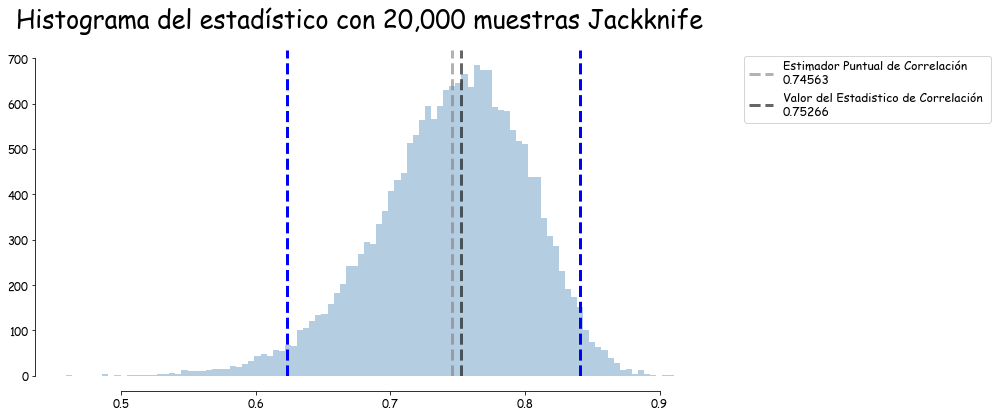

Promedio de la Muestra Jackknife de Correlación =  0.74563
Valor del Estadistico de Correlación =  0.75266
Desviación Estandar de la Muestra Jackknife de Correlación =  0.05581
Intervalo de Confianza = (0.62341, 0.84068)


In [109]:
#Histograma del estadístico con 20,000 muestras Jackknife.

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(c4, bins = 100, color = 'steelblue', alpha = .4)

sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = True)

plt.suptitle('Histograma del estadístico con 20,000 muestras Jackknife', color = 'black', fontsize = 25, fontfamily = 'fantasy')

est_puntual = np.mean(c4)
plt.axvline(est_puntual, linestyle="--",color = "gray", linewidth = 3, alpha = 0.6, label = f"Estimador Puntual de Correlación \n{est_puntual:.5f}")

v4,_ = spearmanr(e1.LSAT, e1.GPA)
plt.axvline(v4, linestyle="--",color = "black", linewidth = 3, alpha=0.6, label = f"Valor del Estadistico de Correlación \n{v4:.5f}")

plt.axvline(np.percentile(c4,2.5),color = "blue", linestyle="--", linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(c4,97.5),color = "blue", linestyle="--", linewidth = 3) 

plt.xticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')
plt.yticks(fontsize = 11.5, fontfamily = 'fantasy', color = 'black')

leg = plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

for i in range(2):
    leg.texts[i].set_color('black')
    leg.texts[i].set_family('fantasy')

plt.show()

print(f"Promedio de la Muestra Jackknife de Correlación = {np.mean(c4): .5f}")
print(f"Valor del Estadistico de Correlación = {v4: .5f}")
print(f'Desviación Estandar de la Muestra Jackknife de Correlación = {np.std(c4): .5f}')
print(f'Intervalo de Confianza = ({np.percentile(c4,2.5):.5f},{np.percentile(c4,97.5): .5f})')

### Problema 3: 

Calcular el error estándar de las betas del modelo lineal, les expliqué la idea de este problema.

In [110]:
#Importamos la base de datos "lineal_horm.xlsx".
horm = pd.read_excel(path + "lineal_horm.xlsx")
#Mostramos las primeras 5 filas de la base de datos importada.
horm.head()

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6


In [111]:
#Tomamos como variable independiente las horas para estimar el monto 
h = horm[['horas']]
m = horm[['monto']]

In [112]:
#Asignamos a una variable la función que obtendrá la regresión lineal.
rl = LinearRegression()
#Ajustamos la regresión lineal utilizando como parámetros las horas y los montos. 
rl.fit(h, m)
#Predecimos los posibles valores de los montos y los reajustamos para que encajen con el resto de las dimensiones.
m1 = rl.predict(h).reshape(-1)
#Transfomamos los valores de los horas de un formato data frame a un arreglo.
h1 = h.to_numpy().reshape(-1)

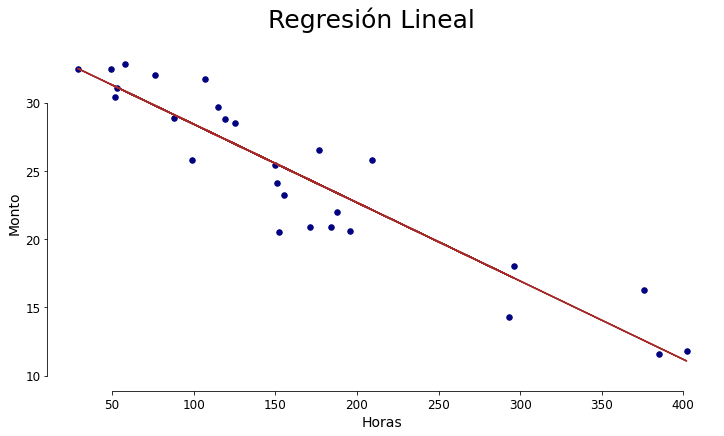

In [113]:
#Graficamos nuestra regresión lineal
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(h, m, s = 30, color = 'navy')
plt.plot(h1, m1, color='brown')
plt.suptitle('Regresión Lineal', color = 'black', fontsize = 25, fontfamily = 'sans-serif')
sns.despine(offset = {'bottom' : 15, 'left' : 0}, trim = True)
plt.xlabel("Horas", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
plt.ylabel("Monto", fontsize = 14, fontfamily = 'sans-serif', color = 'black')
plt.xticks(fontsize = 12, fontfamily = 'sans-serif', color = 'black')
plt.yticks(fontsize = 12, fontfamily = 'sans-serif', color = 'black')
plt.show()

In [114]:
#Calculamos los errores estandar de nuestros estimadores.

#Transformamos el formato de los montos de data frame a un arreglo.
y = m.to_numpy().reshape(-1)
#Guardamos la longitud de y en una variable.
n = len(y)
#Obtenemos el valor residual.
r = y - m1
#Sumamos los valores de la muestra de las horas menos su media y lo elevamos al cuadrado.
sum_h = sum((h1-np.mean(h1))**2) 

#SUMA DE RESIDUOS AL CUADRADO.
RSS = sum(r**2)

#ERROR ESTANDAR RESIDUAL.
RSE = np.sqrt(RSS/(n-2))

#ERROR ESTANDAR BETA 1.
SEB1 = np.sqrt((RSE**2)/sum_h)

#ERROR ESTANDAR BETA 0.
SEB0 = np.sqrt((RSE**2)*((1/n) + ((np.mean(h1)**2)/sum_h)))

#Imprimimos en pantalla los errores estándar de BETA 1 y BETA 0.
print('SE Beta 1 = {0}\nSE Beta 0 = {1}'.format(SEB1, SEB0))

SE Beta 1 = 0.004464173160311538
SE Beta 0 = 0.8671972620941917


In [115]:
#Creamos una nueva tabla que cotenga los valores de los residuales.
t1 = pd.DataFrame(r, columns=['residual'])
#Creamos un nueva columna en la tabla "t1" y asignamos los valores correspondientes a las horas.
t1["h"] = h1
#Esta variable representa el numero de simulaciones que realizaremos. 
N = 10000
#Creamos un arreglo para almacenar los residuales de BETA 1.
res_b1 = np.array([ ])
#Creamos un arreglo para almacenar los residuales de BETA 1.
res_b0 = np.array([ ])

#Realizamos el bucle que llevará a cabo nuestras simulaciones.
for i in range(0, N):
    #Elegimos valores aleatorios de nuestro vector de valores residuales.
    r_i = np.random.choice(r, len(r), replace=True)
    #Creamos una tabla auxiliar que almacene los valores residuales aletorios y renombramos las columnas con el nombre "residual".
    aux = pd.DataFrame(r_i, columns = ['residual'])
    #Creamos una tabla auxiliar que cruce todas las tuplas de las tablas "aux" y "t1", y usamos como referencia a la columna "residual" que se encuentra en ambas tablas.  
    aux = pd.merge(aux, t1, how="inner", on = ["residual"])
    
    #Transformamos el formato de las horas de data frame a un arreglo.
    x_i = aux[["h"]].to_numpy().reshape(-1)
    #Sumamos los valores de la muestra de cada hora i menos su media y lo elevamos al cuadrado.
    sum_xi = sum((x_i-np.mean(x_i))**2)
    
    #SUMA DE RESIDUOS AL CUADRADO i.
    RSSi = sum(r_i**2)
    #ERROR ESTANDAR RESIDUAL i.
    RSEi = np.sqrt(RSSi/n)
    
    #ERROR ESTANDAR i de BETA 1.
    SEB1i = np.sqrt((RSEi**2)/sum_xi)
    #ERROR ESTANDAR i de BETA 0.
    SEB0i = np.sqrt((RSEi**2)*((1/n) + ((np.mean(x_i)**2)/sum_xi)))
   
    #Agregamos al arreglo los datos contenidos en las variables "res_b1" y "SEB1i". 
    res_b1 = np.append(res_b1, SEB1i)
    #Agregamos al arreglo los datos contenidos en las variables "res_b0" y "SEB0i".
    res_b0 = np.append(res_b0, SEB0i)

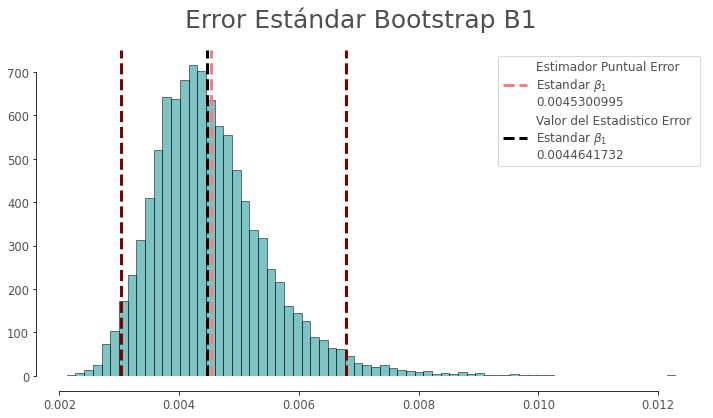

Error Estándar sin Bootsrap =  0.004464173160311538
Promedio de Error Estándar de las muestras Bootstrap =  0.00453009949804686
Intervalo de Confianza = (0.00303, 0.00679)


In [116]:
#Graficamos el Error Estándar de B1.

color_hist = 'darkcyan'
color_int = "maroon"
color_esterr = 'black'
color_epuntual = 'lightcoral'

fig, ax = plt.subplots(figsize=(12, 6))

plt.suptitle("Error Estándar Bootstrap B1", color = '#4f4f4f', fontsize = 25, fontfamily = 'sans-serif')

plt.hist(res_b1, bins = 70, alpha = 0.5, edgecolor = "black", color = color_hist)

plt.axvline(x = np.mean(res_b1), color = color_epuntual, linestyle='--', linewidth = 3, label = "Estimador Puntual Error \nEstandar " + r'$\beta_{1}$' + f'\n{np.mean(res_b1):.10f}')

plt.axvline(x = SEB1, color = color_esterr, linestyle='--', linewidth = 3, label = f"Valor del Estadistico Error \nEstandar " + r'$\beta_{1}$' + f'\n{SEB1:.10f}')

plt.axvline(np.percentile(res_b1,2.5), color = color_int, linestyle="--",linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(res_b1,97.5), color = color_int, linestyle="--",linewidth = 3) 

sns.despine(offset = {'bottom' : 15, 'left' : 0},  trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'sans-serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'sans-serif', color = '#525252')

leg = plt.legend(fontsize = 12) 

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('sans-serif')
    
plt.show()
print("Error Estándar sin Bootsrap = ", SEB1)
print("Promedio de Error Estándar de las muestras Bootstrap = ", np.mean(res_b1))
print(f'Intervalo de Confianza = ({np.percentile(res_b1,2.5):.5f},{np.percentile(res_b1,97.5): .5f})')

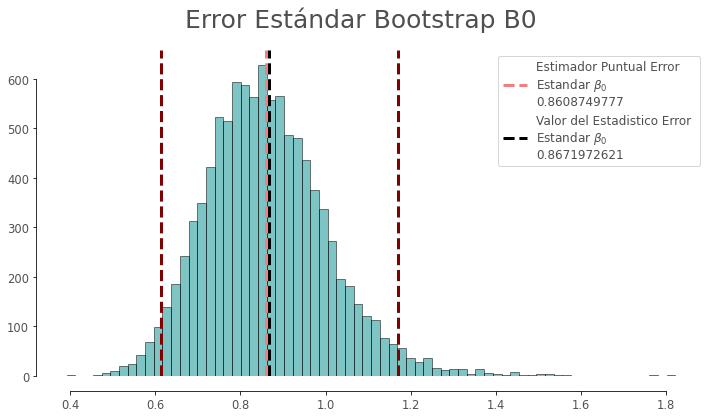

Error Estándar sin Bootstrap =  0.8671972620941917
Promedio de Error Estándar de las muestras Bootstrap =  0.8608749777402652
Intervalo de Confianza = (0.61290, 1.16900)


In [117]:
#Graficamos el Error Estándar de B0.
fig, ax = plt.subplots(figsize=(12, 6))

plt.suptitle("Error Estándar Bootstrap B0", color = '#4f4f4f', fontsize = 25, fontfamily = 'sans-serif')

plt.hist(res_b0, bins = 70, alpha = 0.5, edgecolor = "black", color = color_hist)

plt.axvline(x = np.mean(res_b0), color = color_epuntual, linestyle='--', linewidth = 3, label = "Estimador Puntual Error \nEstandar " + r'$\beta_{0}$' + f'\n{np.mean(res_b0):.10f}')

plt.axvline(x = SEB0, color = color_esterr, linestyle='--', linewidth = 3, label = f"Valor del Estadistico Error \nEstandar " + r'$\beta_{0}$' + f'\n{SEB0:.10f}')

plt.axvline(np.percentile(res_b0,2.5), color = color_int, linestyle="--",linewidth = 3)                                                                                                                                                    
plt.axvline(np.percentile(res_b0,97.5), color = color_int, linestyle="--",linewidth = 3) 

sns.despine(offset = {'bottom' : 15, 'left' : 0},  trim = True)

plt.xticks(fontsize = 11.5, fontfamily = 'sans-serif', color = '#525252')
plt.yticks(fontsize = 11.5, fontfamily = 'sans-serif', color = '#525252')

leg = plt.legend(fontsize = 12) 

for i in range(2):
    leg.texts[i].set_color('#4f4f4f')
    leg.texts[i].set_family('sans-serif')
    
plt.show()
print("Error Estándar sin Bootstrap = ", SEB0)
print("Promedio de Error Estándar de las muestras Bootstrap = ", np.mean(res_b0))
print(f'Intervalo de Confianza = ({np.percentile(res_b0,2.5):.5f},{np.percentile(res_b0,97.5): .5f})')